# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

import pickle

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print("X_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

X_train shape = (39209, 32, 32, 3)
y_train shape = (39209,)
X_test shape = (12630, 32, 32, 3)
y_test shape = (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
## Read sign labels and save it in a list
import csv

sign_names = list()

with open('signnames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        sign_names.append(row[1])
        
print('Sign names mapped')

Sign names mapped


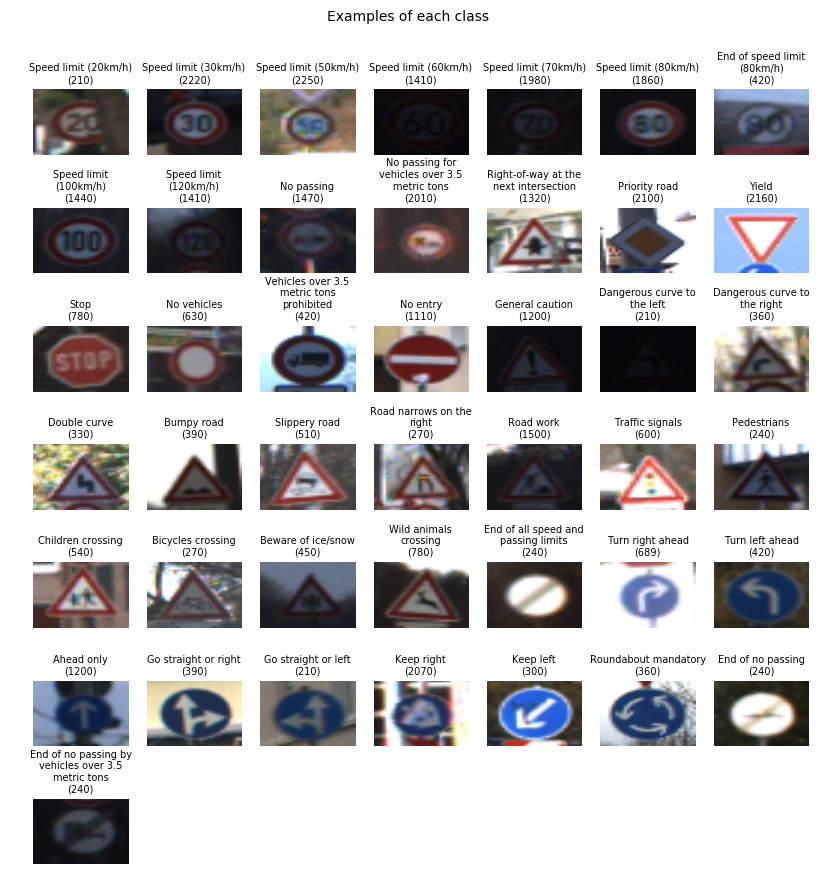

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

## Plot one example of each class
from textwrap import wrap

rows = 7
samples = list()

fig = plt.figure(facecolor="white")
fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace=.8)

for i in range(n_classes):
    count = sum(y_train == i)
    index = random.choice(np.where(y_train == i)[0])
    
    ax=fig.add_subplot(rows,rows,i+1, aspect='equal')        
    ax.imshow(X_train[index])
    ax.axis('off')
    ax.set_title("\n".join(wrap(sign_names[i],20)) + "\n(" + str(count) + ")", fontsize = 7)
    ax.axis('tight')
plt.suptitle('Examples of each class')

In [5]:
## Plot number of each examples in the test data
import collections

def plot_sample_class_distributions(samples, title):
    
    label_count = list()
    for i in range(n_classes):
        label_count.append((samples == i).sum())

    indexes = np.arange(len(sign_names))

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(8, 8)
    ax = fig.add_subplot(111)
    
    ax.barh(indexes, label_count, alpha=0.75)
    ax.axis([0, np.max(label_count)+10, 0, n_classes])
    ax.set_yticks(indexes + 0.5)
    ax.set_yticklabels(sign_names, fontsize = 8)

    ax.set_ylabel('Sign Classes', fontsize = 10)
    ax.set_xlabel('Number of Traffic Signs', fontsize = 10)
    ax.set_title(title, fontsize = 14)

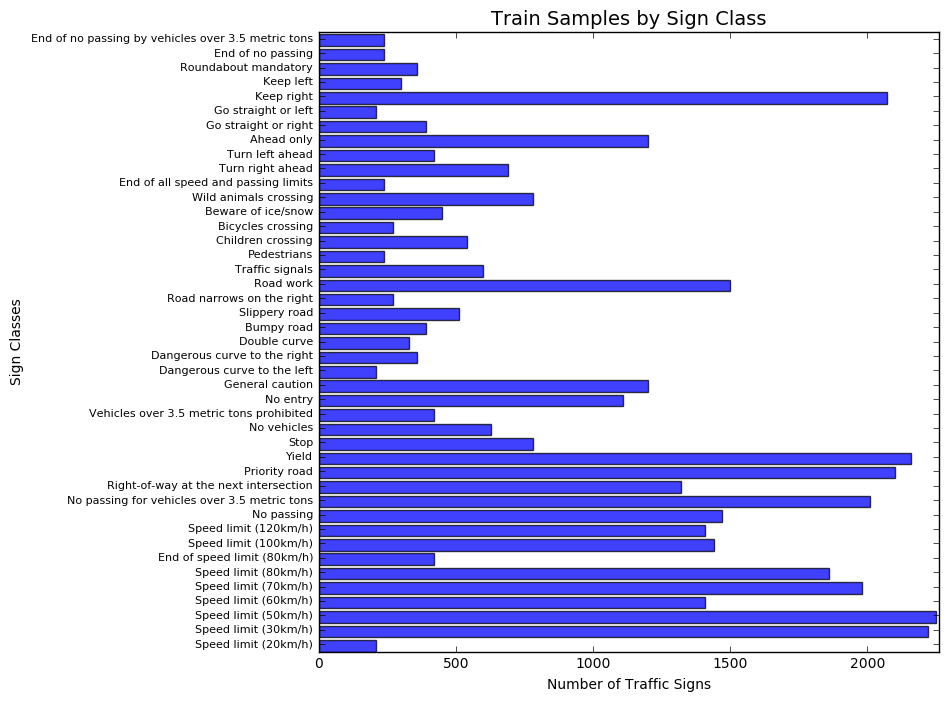

In [6]:
plot_sample_class_distributions(samples=y_train, title='Train Samples by Sign Class')

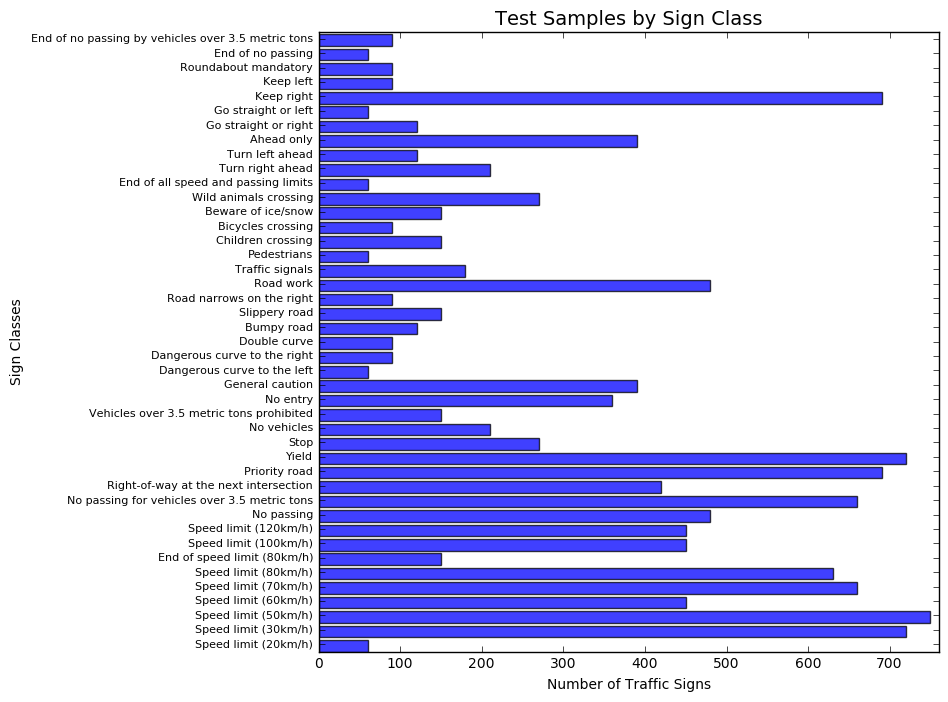

In [7]:
plot_sample_class_distributions(samples=y_test, title='Test Samples by Sign Class')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Normalize the data features to the variable X_normalized
def normalize(data):
    a = -0.5
    b = 0.5
    xmin = np.min(data)
    xmax = np.max(data)

    return a + (data - xmin) * (b - a)/(xmax - xmin)

# One Hot encode the labels to the variable y_one_hot
from sklearn import preprocessing
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(y_test)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
There are three preprocess implementation:
* Shuffle - avoid mini batches during training
* Normalization - improve convergence in Dradient Descent
* One-hot encode labels - represent the classes mathematically

Obs.: The normalization and one-hot label encode will be actually done after data augmentation, which is presented below:

In [9]:
import cv2
from tqdm import tqdm

# Copy data for the generated images
X_train_fake = np.copy(X_train)
y_train_fake = np.copy(y_train)

# Get the maximum occurrence
max_occurrence = max([np.sum(y_train_fake == i) for i in set(y_train_fake)])

# Function to plot example data
def plot_example(image1, image2, title):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(5, 5)
    ax=fig.add_subplot(221)        
    ax.imshow(image1)
    ax.axis('off')
    ax.axis('tight')
    ax=fig.add_subplot(222) 
    ax.imshow(image2)
    ax.axis('off')
    ax.axis('tight')
    plt.suptitle(title)

Processing 39: 100%|██████████| 180/180 [00:00<00:00, 57005.04it/s]


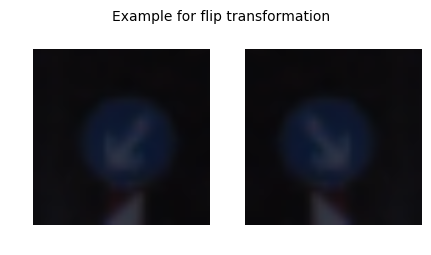

In [10]:
### Generate additional data (Flip)

# Vector of data to be flipped and the new category
flip_sign = [[11, 12, 13, 15, 17, 18, 19, 20, 22, 26, 30, 33, 34, 35, 36, 37, 38, 39],
             [11, 12, 13, 15, 17, 18, 20, 19, 22, 26, 30, 34, 33, 35, 37, 36, 39, 38]]

# Placeholders for the images and labels
flip_images = list()
flip_labels = list()

for i in range(len(flip_sign[0])):
    index = np.where(y_train == flip_sign[0][i])[0]
    
    # Flip images only if number of images in the set is smaller than the maximum occurrence
    if len(np.where(y_train_fake == flip_sign[1][i])[0]) < max_occurrence:
        ## Add data only to match the maximum occurrence
        pbar = tqdm(range(min(len(index), max_occurrence - len(np.where(y_train_fake == flip_sign[1][i])[0]))))
        pbar.set_description('Processing %d' %flip_sign[0][i])
    
        for j in pbar:
            fimg = np.copy(X_train[index[j]])
            fimg = cv2.flip(fimg, 1)

            flip_images.append(fimg)
            flip_labels.append(flip_sign[1][i])        

if (len(flip_images) > 0):
    X_train_fake = np.append(X_train_fake, flip_images, axis=0)
    y_train_fake = np.append(y_train_fake, flip_labels, axis=0)
    
    plot_example(X_train_fake[index[j]], flip_images[-1], 'Example for flip transformation')

Processing 42: 100%|██████████| 240/240 [00:00<00:00, 8326.09it/s]


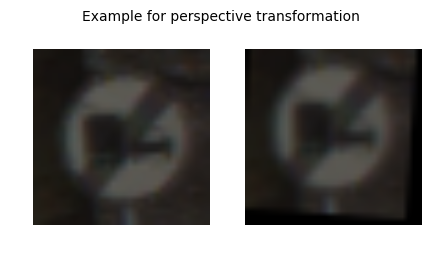

In [11]:
### Generate additional data (Perspective)
from random import randint

# Number of times to run random perspective transformation
times = 2

# Placeholders for the images and labels
perspective_images = list()
perspective_labels = list()

def perspective_transform(img):
    width,height,channel = img.shape
    
    band = 3
   
    input = np.array([
        [0, 0],
        [width, 0],
        [width, height],
        [0, height]], dtype = "float32")
    
    output = np.array([
        [randint(-band,band), randint(-band,band)],
        [width - randint(-band,band), randint(-band,band)],
        [width - randint(-band,band), height - randint(-band,band)],
        [randint(-band,band), height - randint(-band,band)]], dtype = "float32")
    
    M = cv2.getPerspectiveTransform(input, output)
    warp = cv2.warpPerspective(img, M, (width, height))
    
    return warp

# Number of times to run perspective transformation
for k in range(times):
    for i in range(n_classes):
        # Rotate images only if number of images in the set is smaller than the maximum occurrence
        index = np.where(y_train_fake == i)[0]
        if (k + 1) * len(index) < max_occurrence:
            pbar = tqdm(range(min(len(index), max_occurrence - (k + 1) * len(index))))
            pbar.set_description('Processing %d' %i)

            for j in pbar:
                rimg = np.copy(X_train_fake[index[j]])
                rimg = perspective_transform(rimg)

                perspective_images.append(rimg)
                perspective_labels.append(y_train_fake[index[j]])

if len(perspective_images) > 0:
    X_train_fake = np.append(X_train_fake, perspective_images, axis=0)
    y_train_fake = np.append(y_train_fake, perspective_labels, axis=0)

    plot_example(X_train_fake[index[j]], perspective_images[-1], 'Example for perspective transformation')

Processing 42 with angle -15: 100%|██████████| 90/90 [00:00<00:00, 22780.00it/s]


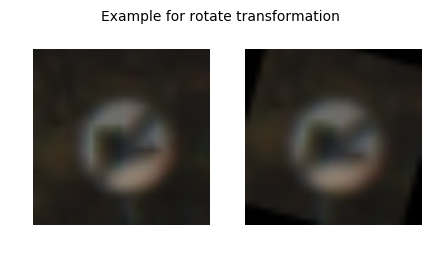

In [12]:
### Generate additional data (Rotation)

# Vector with all the angles to the images be rotated
angles = [-10, 10, -15, 15]

# Placeholders for the images and labels
rotate_images = list()
rotate_labels = list()

def rotate_image(img, angle):
    rows,cols,channel = img.shape

    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    return dst

# Rotate different angles
for k in range(len(angles)):
    for i in range(n_classes):
        # Rotate images only if number of images in the set is smaller than the maximum occurrence
        index = np.where(y_train_fake == i)[0]
        if (k + 1) * len(index)  < max_occurrence:
            ## Add data only to match the maximum occurrence
            pbar = tqdm(range(min(len(index), max_occurrence - (k + 1) * len(index))))
            pbar.set_description('Processing %d with angle %d' %(i, angles[k]))

            for j in pbar:
                rimg = np.copy(X_train_fake[index[j]])
                rimg = rotate_image(rimg, angles[k])

                rotate_images.append(rimg)
                rotate_labels.append(y_train_fake[index[j]])
                
if (len(rotate_images) > 0):
    X_train_fake = np.append(X_train_fake, rotate_images, axis=0)
    y_train_fake = np.append(y_train_fake, rotate_labels, axis=0)

    plot_example(X_train_fake[index[j]], rotate_images[-1], 'Example for rotate transformation')

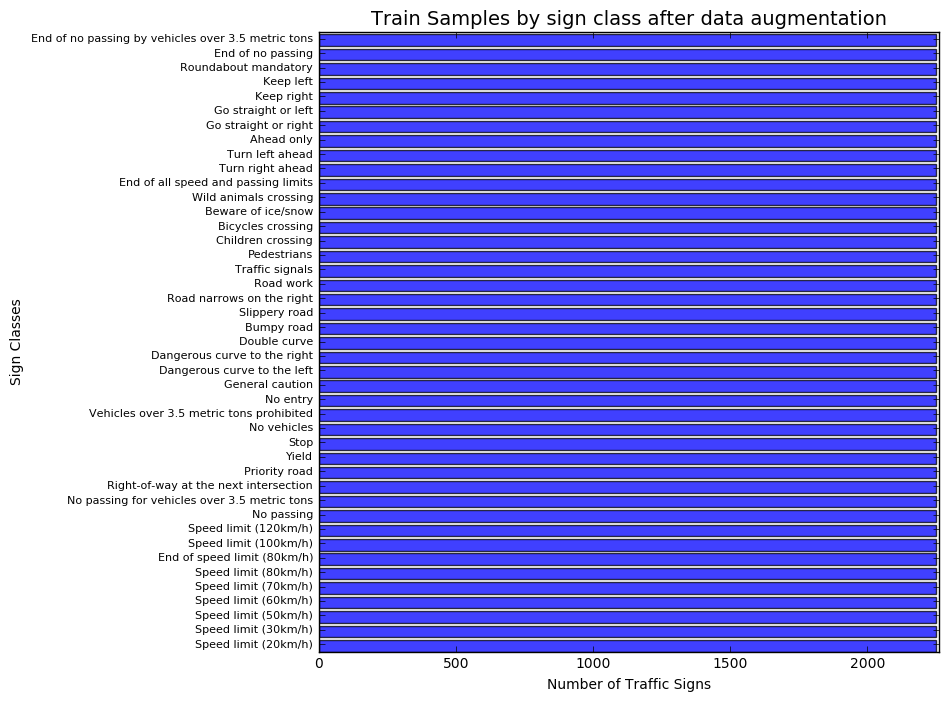

In [13]:
# Plot after data augmentation
plot_sample_class_distributions(samples=y_train_fake, title='Train Samples by sign class after data augmentation')

In [14]:
# Normalize images and hot encode labels dependind on the augmentation flag
augmentation = 1

# Normalize data and hot encode labels
if augmentation:
    X_train_normalized = normalize(X_train_fake)
    y_train_encoded = label_binarizer.transform(y_train_fake)
else:
    X_train_normalized = normalize(X_train)
    y_train_encoded = label_binarizer.transform(y_train)
    
X_test_normalized = normalize(X_test)
y_test_encoded = label_binarizer.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded = y_test_encoded.astype(np.float32)
X_train_normalized = X_train_normalized.astype(np.float32)
X_test_normalized = X_test_normalized.astype(np.float32)

In [15]:
### Split the data into training/validation/testing sets here.
from sklearn.model_selection import train_test_split

# Split testing set
X_train_normalized, X_valid_normalized, y_train_encoded, y_valid_encoded = \
    train_test_split(X_train_normalized, y_train_encoded, test_size=0.1, random_state=42)

print("Number of training examples   =", len(X_train_normalized))
print("Number of validation examples = ", len(X_valid_normalized))
print("Number of testing examples    = ", len(X_test_normalized))

Number of training examples   = 87075
Number of validation examples =  9675
Number of testing examples    =  12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

#### Data augmentation
##### Flipping
The following images can be flipped in order generate more data for the test set:
* Right-of-way at the next intersection (1320)
* Priority road (2100)
* Yield (2160)
* No vehicles (630)
* No entry (1110)
* General caution (1200)
* Dangerous curve to the left (210)
* Dangerous curve to the right (360)
* Bumpy road (390)
* Traffic signals (600)
* Beware of ice/snow (450)
* Turn right ahead (689)
* Turn left ahead (420)
* Ahead only (1200)
* Go straight or right (390)
* Go straight or left (210)
* Keep right (2070)
* Keep left (300)

##### Perspective
The images are randomly transformed from -3 to +3 of each vertex

##### Rotating
The images were rotate -10, +10 and +5 degrees

#### Data Splitting
The inicial idea was to use de proportion 80/20, however, after data augmentation the computer ran out of memory to calculate de validation accuracy, so a proportion of 90/10 needed to be use
* Training: 90%
* Validation: 10%

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Input image size
image_size = X_train[0].shape[0]
num_channels = X_train[0].shape[2]

# Filter size
kernel_size = 5
depth1 = 32
depth2 = 64
depth3 = 1024
depth4 = 256

graph = tf.Graph()
with graph.as_default():
    features = tf.placeholder(tf.float32, [None, image_size, image_size, num_channels])
    labels = tf.placeholder(tf.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.float32)
    beta = tf.placeholder(tf.float32)
    learning_rate = tf.placeholder(tf.float32)
    
    weights = {
        'layer1': tf.Variable(tf.truncated_normal(shape = [kernel_size, kernel_size, num_channels, depth1], stddev = 0.1)),
        'layer2': tf.Variable(tf.truncated_normal(shape = [kernel_size, kernel_size, depth1, depth2], stddev = 0.1)),
        'layer3': tf.Variable(tf.truncated_normal(shape = [image_size // 4 * image_size // 4 * depth2, depth3], stddev = 0.1)),
        'layer4': tf.Variable(tf.truncated_normal(shape = [depth3, depth4], stddev = 0.1)),
        'layer5': tf.Variable(tf.truncated_normal(shape = [depth4, n_classes], stddev = 0.1))
    } 

    biases = {
        'layer1': tf.Variable(tf.zeros([depth1])),
        'layer2': tf.Variable(tf.zeros([depth2])),
        'layer3': tf.Variable(tf.zeros([depth3])),
        'layer4': tf.Variable(tf.zeros([depth4])),
        'layer5': tf.Variable(tf.zeros([n_classes]))
    }

    # Layer 1: Input: 32 x 32 x 3 - Output: 32 x 32 x 32
    conv = tf.nn.conv2d(features, weights['layer1'], strides = [1, 1, 1, 1], padding = 'SAME') + biases['layer1'] # (32, 32, 3) (32, 32, 32)
    hidden = tf.nn.relu(conv)
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # (32, 32, 32) (16, 16, 32)
    
    # Layer 2: Input: 16 x 16 x 32 - Output: 8 x 8 x 64
    conv = tf.nn.conv2d(pool, weights['layer2'], strides = [1, 1, 1, 1], padding = 'SAME') + biases['layer2'] # (16, 16, 32) (16, 16, 64)
    hidden = tf.nn.relu(conv)
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # (16, 16, 64) (8, 8, 64)
    reshape   = flatten(pool) # (8, 8, 64) (1, 1024)
    
    # Layer 3: Input: 1 x 1024 - Output: 1 x 1024
    fc1 = tf.matmul(reshape, weights['layer3']) + biases['layer3']
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Input: 1 x 1024 - Output: 1 x 256
    fc2    = tf.matmul(fc1, weights['layer4']) + biases['layer4']
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Input: 1 x 256 - Output: 1 x 43  
    logits = tf.matmul(fc2, weights['layer5']) + biases['layer5']

    # Training Pipeline
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, labels)
    loss_operation  = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    
    # Probability
    prediction = tf.nn.softmax(logits)
    
    # Evaluation of top five probabilities
    top_five = tf.nn.top_k(prediction, 5)
    
    # Model Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** For a solution to this problem I chose the LeNet algorith, presented below:

**Layer 1**<br>
*Input: 32 x 32 x 3*<br>
Convolution: Kernel - 5 x 5, Stride - 1 x 1, Padding - 'SAME'<br>
Activation<br>
Pooling: Kernel - 2 x 2, Stride - 2 x 2, Padding - 'SAME'<br>
*Output: 32 x 32 x 32*<br>
<br>
**Layer 2**<br>
*Input: 16 x 16 x 32*<br>
Convolution: Kernel - 5 x 5, Stride - 1 x 1, Padding - 'SAME'<br>
Activation<br>
Pooling: Kernel - 2 x 2, Stride - 2 x 2, Padding - 'SAME'<br>
Flatten<br>
*Output: 1 x 1024*<br>
<br>
**Layer 3**<br>
*Input: 1 X 1024*<br>
Fully Connected<br>
Activation<br>
*Output: 1 x 1024*<br>
<br>
**Layer 4**<br>
*Input: 1 X 1024*<br>
Fully Connected<br>
Activation<br>
Dropout<br>
*Output: 1 x 256*<br>
<br>
**Layer 5**<br>
*Input: 1 X 256*<br>
Fully Connected<br>
*Output: 1 x 43*<br>

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Parameters
epochs = 25 # Maximum epoch number
batch_size = 64 # Batch size
train_data_size = X_train_normalized.shape[0] # Training data size

# Feed_dict
feed_dict_valid = {features: X_valid_normalized, labels: y_valid_encoded, keep_prob: 1.0}
feed_dict_test = {features: X_test_normalized, labels: y_test_encoded, keep_prob: 1.0}

# Log lists
test_acc = list()
test_loss = list()
valid_acc = list()

with tf.Session(graph = graph) as session:
    tf.global_variables_initializer().run()
    
    for epoch in range(1, epochs + 1):
        
        # Shuffle the indices for the trainning data
        ind = np.arange(0, train_data_size)
        np.random.shuffle(ind)
        X_train_shuffle = X_train_normalized[ind]
        y_train_shuffle = y_train_encoded[ind]
        
        for batch_ind in range(0, train_data_size, batch_size):
            batch_data = X_train_shuffle[batch_ind : (batch_ind + batch_size), :, :, :]
            batch_labels = y_train_shuffle[batch_ind : (batch_ind + batch_size), :]
            feed_dict_train = { features: batch_data, labels: batch_labels, keep_prob: 0.5, beta: 1e-6, learning_rate: 0.001 }
            _, l, acc = session.run([training_operation, loss_operation, accuracy], feed_dict = feed_dict_train)
            test_acc.append(acc)
            test_loss.append(l)
            
        valid_accuracy = accuracy.eval(feed_dict = feed_dict_valid)
        valid_acc.append(valid_accuracy)
        
        print("Epoch: %d\tloss: %f\tAccuracy: %f\tValidation accuracy: %f" %(epoch, l, acc,valid_accuracy))

        # If both accuracy better than 0.99, stop running
        if(valid_accuracy > 0.99 and acc > 0.99):
            break

    print("\nTest accuracy:\t%f" %accuracy.eval(feed_dict = feed_dict_test))

    saver.save(session, 'model')
    print("\nModel saved")

Epoch: 1	loss: 0.357308	Accuracy: 0.885714	Validation accuracy: 0.962377
Epoch: 2	loss: 0.028817	Accuracy: 1.000000	Validation accuracy: 0.984703
Epoch: 3	loss: 0.006694	Accuracy: 1.000000	Validation accuracy: 0.987080
Epoch: 4	loss: 0.019600	Accuracy: 1.000000	Validation accuracy: 0.987390
Epoch: 5	loss: 0.000024	Accuracy: 1.000000	Validation accuracy: 0.988114
Epoch: 6	loss: 0.022587	Accuracy: 1.000000	Validation accuracy: 0.988734
Epoch: 7	loss: 0.003324	Accuracy: 1.000000	Validation accuracy: 0.991111

Test accuracy:	0.957483

Model saved


In [18]:
def plot_iteration_graph(data, title, xlabel, ylabel):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(9, 4)
    ax = fig.add_subplot(111)

    ax.plot(data)
    ax.axis([0, len(data), min(data) - 0.05, max(data) + 0.05])

    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontsize = 14)

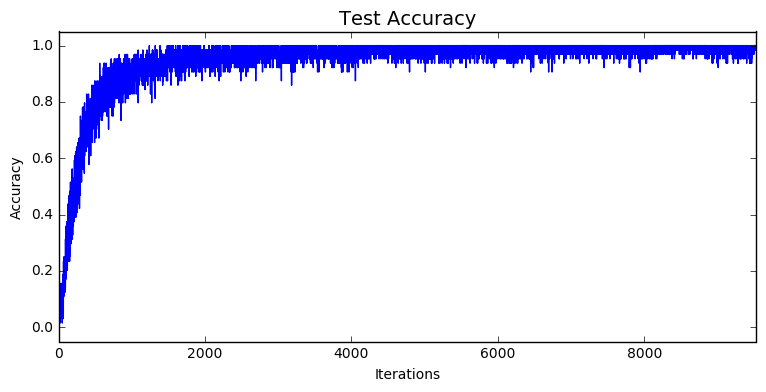

In [19]:
plot_iteration_graph(test_acc, 'Test Accuracy', 'Iterations', 'Accuracy')

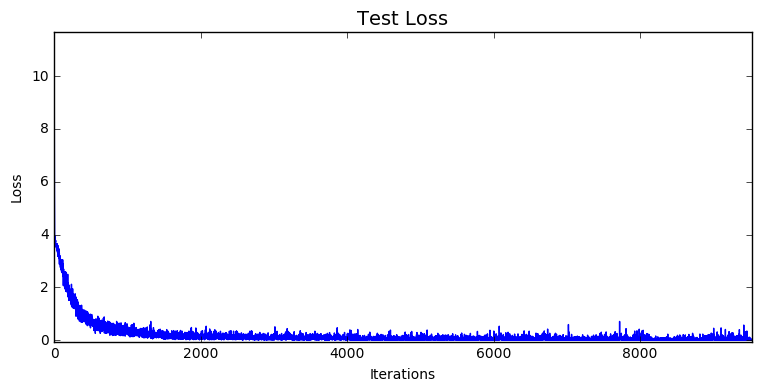

In [20]:
plot_iteration_graph(test_loss, 'Test Loss', 'Iterations', 'Loss')

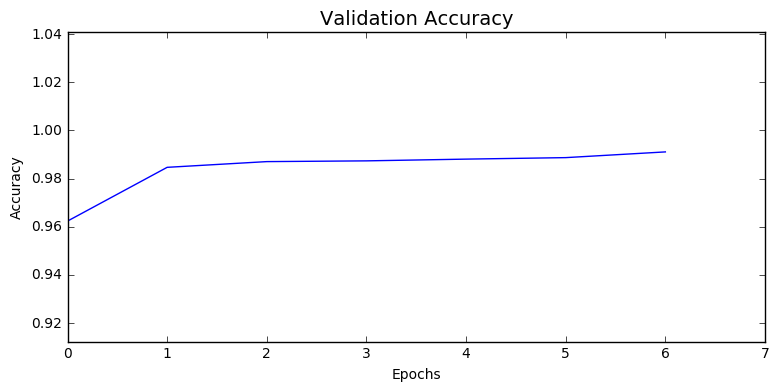

In [21]:
plot_iteration_graph(valid_acc, 'Validation Accuracy', 'Epochs', 'Accuracy')

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* Optimizer: Adam optimizer was chosen presenting a accuracy of ~94% in the test data with less than 10 epochs. Gradient Descent optimizer took 25 epochs in order to achieve a accuracy of only ~91% with different learning rates.
* Learning Rate: A learning rate of 0.001 is a pretty good value for Adam optimizer, however it is too slow when testing with Gradient Descent optimizer
* Batch Size: I used 64, but I did not noticed much difference while training the model with different batch sizes
* Epochs: The maximum value set for the epochs is 25, however the algorithm stops if both the training and the validation accuracy are above 99%. It was noticed that continue training does not improve the test accuracy

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** In the beggining I faced some problens adapting the LeNet algorithm to this model, but after a lot of trials and errors it finaly worked. I did not invest too much time tunning the model because the initial implementation already presented a good result, most of my time was invested making all the analysis here presented. However, I know how important it is to internalize how all the variables affect the model behaviour. 

I think this architecture is suitable for this problem because the accuracy on the test was satisfactory (~95%). If I have more time, I would invest it augmenting more my date instead of tunning the model.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

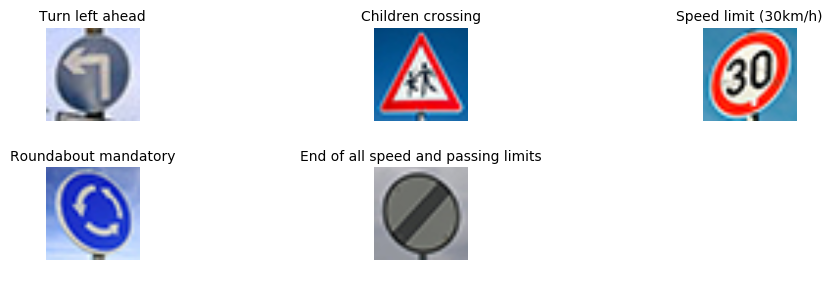

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image

path = "Signs//"
image_names = os.listdir(path)
web_images = list()

# Placeholders for the images and labels from web
web_images_normalized = np.empty(shape = [1, 32, 32, 3], dtype = np.float32)
web_labels = np.empty(shape = [1], dtype = np.int8)

fig = plt.figure(facecolor="white")
fig.set_size_inches(12, 3)
fig.subplots_adjust(hspace=.5)
    
def plot_image(image, label, i):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(label, fontsize = 10)

for i in range(len(image_names)):
    image = Image.open(path + image_names[i])
    web_images.append(image)
    
    web_images_normalized = np.vstack([web_images_normalized, np.reshape(image, [1, 32, 32, 3])])
    web_labels = np.vstack([web_labels, int(os.path.splitext(image_names[i])[0])])

    label = sign_names[int(os.path.splitext(image_names[i])[0])]
    plot_image(image, label, i)

    
# Get rid of the first empty row
web_images_normalized = web_images_normalized[1:, :, :, :]
web_labels = web_labels[1:]

# Pre-process data
web_labels_encoded = label_binarizer.transform(web_labels)
web_images_normalized = normalize(web_images_normalized)

web_images_normalized = web_images_normalized.astype(np.float32)
web_labels_encoded = web_labels_encoded.astype(np.float32)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I do not see any particular quality that might make classification difficult, but when choosing the images, I decided to get some where the pictures were not taken straight to the sign, such as "Speed limit (30km / h)" and "Roundabout mandatory" Sign above.

Looking at the examples from the training set, most of the images are taken perpendicular to their plane, so I would like to see how my algorithm would perform in this examples.

Sign 1 		Turn left ahead


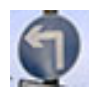

	99.93%	Turn left ahead
	0.05%	Go straight or left
	0.02%	Roundabout mandatory

Sign 2 		Children crossing


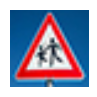

	96.18%	Children crossing
	3.71%	Road work
	0.11%	Beware of ice/snow

Sign 3 		Speed limit (30km/h)


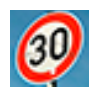

	100.00%	Speed limit (30km/h)

Sign 4 		Roundabout mandatory


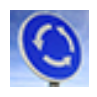

	100.00%	Roundabout mandatory

Sign 5 		End of all speed and passing limits


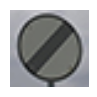

	100.00%	End of all speed and passing limits


Test accuracy: 100.00%


In [23]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import cv2
   
def plot_image_prob(image):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(1, 1)
    ax = fig.add_subplot(111)
    ax.imshow(image)
    plt.axis('off')
    ax.axis('tight')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

# Feed_dict for the web images
feed_dict_web = {features: web_images_normalized, labels: web_labels_encoded, keep_prob: 1.0}

with tf.Session(graph = graph) as session:
    # Restore the trained model
    saver = tf.train.import_meta_graph('model.meta')
    saver.restore(session, tf.train.latest_checkpoint('./'))
    
    # Get the top five result
    acc, top_five_res = session.run([accuracy, top_five], feed_dict = feed_dict_web)
    
    # Go through all the images
    for i in range(web_images_normalized.shape[0]):
        print('Sign %d \t\t%s' %(i+1, sign_names[web_labels[i][0]]))
        plot_image_prob(web_images[i])
        for j in range(5):            
            # Get the probability of the result
            prob = top_five_res.values[i][j]*100
            if(prob >= 0.01):
                # Print probability and label
                print('\t%.2f%%\t%s' %(prob, sign_names[top_five_res.indices[i][j]]))
        print()
        
    print('\nTest accuracy: %.2f%%' %(acc*100))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model was performing well since the beggining, however, from the 5 images, only 4 were correct identified. The first picture "Turn left ahead" was being wrongly identified as "Go straight or right".

Analyzing the test set I found out that the number of examples was really low (bellow 500), so I decided to augment my data and try to correctly predict these 5 examples. This aproach worked and now we can see 100% accuracy on predicting theses examples.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** All the images were correctly predicted, however, the model was not 100% sure of its result for the first and the second one.

The first image showed problematic since the beggining, the first time I ran the algorithm, the model wrongly predicted its class with 50% accuracy, however the correct answer showed up in the second position. Augmenting the data was the solution for this problem, once the number of examples was not enough.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.